## Logistic Regression-Using Gradient Descent

In this you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

&#920;<sup>T</sup>X = &#952;<sub>0</sub> + &#952;<sub>1</sub>X<sub>1</sub> + &#952;<sub>2</sub>X<sub>2</sub>
 
 Hypothesis function used:  h<sub>&#952;</sub>(x) = 1/1+e<sup>-&#920;<sup>T</sup>X </sup>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

data = np.loadtxt('./Files/ex2data1.txt',delimiter=",")

X = data[:,0:2] #Matrix to store the marks
Y = (data[:,2]).reshape(100,1)   #Matrix to show the admission status

m = Y.size       #No of training samples
n = X.shape[1]   #No of Features

#### Visualizing the data


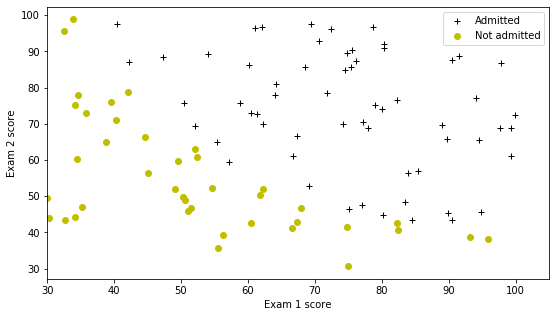

In [2]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])

def PlotD():
    plt.figure(figsize=(9,5))    
    plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(loc='upper right')
    plt.xlim((30,105))
    plt.show()

PlotD()

In [3]:
#Feature Normalization by mean normalization

mean = [] #To store the mean of each feature
STD = []  #To store the STD of each feature

for i in range(n):
    
    mean.append(np.sum(X[:,i],axis=0)/m)
    STD.append(np.std(X[:,i],ddof=1))
    
    #subtracting the mean from each feature respectively
    X[:,i] -= mean[i]
    #Diving each feature with its STD respectively
    X[:,i] /= STD[i]

In [4]:
def SigmoidFn(Z):
    G = scipy.special.expit(Z)
    return G

In [5]:
def CostFn(x,y,Theta):
    h = SigmoidFn(np.dot(x,Theta))
    J = (-1/m)*np.sum((y.T).dot(np.log(h))+(1-y).T.dot(np.log(1-h)))
    return J    

In [6]:
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1) 

In [7]:
def Gradient_d(x,y,Theta,L):
    
    J_History = []
    iterations = 40000
    
    #Applying gradient descent
    for i in range(iterations):
        h = SigmoidFn(np.dot(x,Theta))
        J_History.append(CostFn(x,y,Theta))
        Theta = Theta - L*(1/m)*((x.T).dot(h-y))
    return(J_History,Theta)

In [8]:
L = 0.01
theta = np.zeros((3,1))
cost = CostFn(X,Y,theta)

J,theta = Gradient_d(X,Y,theta,L)
print("Initial Cost:",cost,"\n")
print("Predicted Theta Values:\n",theta,"\n")

Initial Cost: 0.6931471805599452 

Predicted Theta Values:
 [[1.65714729]
 [3.88141855]
 [3.61668833]] 



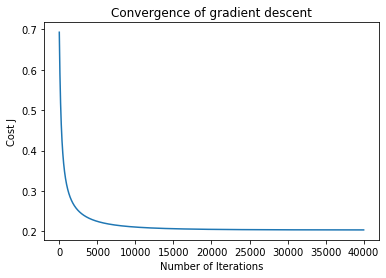

In [9]:
#Visualizing the convergence of gradient descent
plt.title("Convergence of gradient descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J")
plt.plot(J)
plt.show()

In [10]:
cost = CostFn(X,Y,theta)
print("Cost at function minima:",cost,"\n")

Cost at function minima: 0.2036076625697362 



In [11]:
# Student with Exam 1 score 45 and Exam 2 score 85
Prob = scipy.special.expit(np.array([1, (45-mean[0])/STD[0],(85-mean[1])/STD[1]]).dot(theta))
print("Admission Probability: ",Prob[0])

Admission Probability:  0.7674244011408166


In [12]:
def prediction(x,Theta,threshold=0.5):
    p = SigmoidFn(X.dot(Theta)) >= threshold
    return p.astype('int')

In [13]:
p = prediction(X,theta)
print("Accuracy of the training model is:",100*sum(p.ravel() == Y.ravel())/m,"\b%")

Accuracy of the training model is: 89.0 %
